In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import datetime

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

import warnings
warnings.filterwarnings('ignore')

In [2]:
Features = pd.read_pickle('features')

In [3]:
Features['is_raining'] = Features['is_raining'].astype(int)
Features['is_workday'] = Features['is_workday'].astype(int)

In [4]:
Features

,start_time,Rides,Rides_last_hour,avg_tmp,is_raining,is_workday,season__1,season__2,season__3,hour__0,...,hour__13,hour__14,hour__15,hour__16,hour__17,hour__18,hour__19,hour__20,hour__21,hour__22
0,2018-01-01 00:00:00,7,7,-13.90,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2018-01-01 01:00:00,15,7,-15.00,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2018-01-01 02:00:00,10,15,-15.60,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2018-01-01 03:00:00,2,10,-16.70,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2018-01-01 04:00:00,2,2,-17.20,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9356,2018-12-31 19:00:00,41,45,3.30,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9357,2018-12-31 20:00:00,28,41,3.60,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9358,2018-12-31 21:00:00,22,28,3.45,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9359,2018-12-31 22:00:00,25,22,3.30,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
# split the data into testing/training sets
X_train, X_test, y_train, y_test = train_test_split(Features.iloc[:, 2:], Features.iloc[:, 1], test_size=0.3)

# Linear Regression

In [6]:
# create linear regression object
model = LinearRegression()
# train the model using training sets
model.fit(X_train, y_train)

LinearRegression()

In [7]:
#show parameter values
print(f'Intercept: {model.intercept_}')

def print_coef():
    for i in range(len(model.coef_)):
        print(f'Theta {i+1}: {model.coef_[i]}')

print('\nCoefficients:')
print_coef()

Intercept: -82.2176927530299

Coefficients:
Theta 1: 0.8000337735148882
Theta 2: 2.4330796599207427
Theta 3: -13.614830116823189
Theta 4: 23.00467845265865
Theta 5: -21.65394192909654
Theta 6: -10.409196949604498
Theta 7: 27.742646797495663
Theta 8: 15.371986183097247
Theta 9: 27.222580257608385
Theta 10: 38.06436114637461
Theta 11: 41.11016311871641
Theta 12: 51.59658931208406
Theta 13: 119.58423326998675
Theta 14: 259.5555244686846
Theta 15: 450.4924884140033
Theta 16: 325.8520631534109
Theta 17: -139.6407689701746
Theta 18: 72.1486680774317
Theta 19: 218.9140650019447
Theta 20: 213.50451462347434
Theta 21: 144.00145738833226
Theta 22: 140.5722636418226
Theta 23: 259.4975742658018
Theta 24: 477.4103345857239
Theta 25: 468.9847960416232
Theta 26: -135.02842692640044
Theta 27: -61.25674680679719
Theta 28: -41.05446012859753
Theta 29: 2.1000068812504775
Theta 30: 11.857321541428167


In [8]:
# make predictions using the testing set
y_pred = model.predict(X_test)

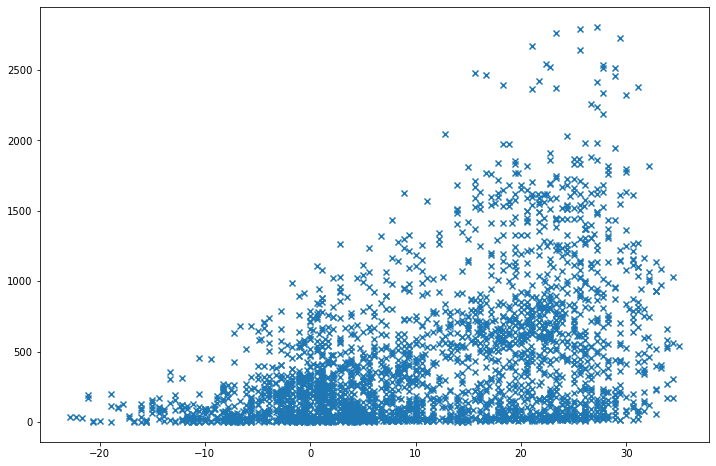

In [9]:
# plot the regression model
plt.figure(figsize=(12,8))

plt.scatter(X_test.iloc[:, 1], y_test, marker='x')

#plt.plot()

plt.show()

In [10]:
# evaluation metrics
print(f'Coefficient of determination: {r2_score(y_pred, y_test):.4f}')

print(f'Root mean squared error: {mean_squared_error(y_pred, y_test)**0.5:.4f}')

print(f'Mean absolute error: {mean_absolute_error(y_pred, y_test):.4f}')

Coefficient of determination: 0.8481
Root mean squared error: 173.8518
Mean absolute error: 115.0532


# Polynomial Regression

## to dos:
- plot regression line
- plot degree vs. rsme
- determine ideal degree value

In [38]:
#create polynomial linear regression object 
poly = PolynomialFeatures(degree=3)

In [40]:
# transform data
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [13]:
# train the model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [18]:
# make predictions using the testing set
y_pred = poly_model.predict(X_test_poly)

In [19]:
# evaluation metrics
print(f'Coefficient of determination: {r2_score(y_pred, y_test):.4f}')

print(f'Root mean squared error: {mean_squared_error(y_pred, y_test)**0.5:.4f}')

print(f'Mean absolute error: {mean_absolute_error(y_pred, y_test):.4f}')

Coefficient of determination: 0.9670
Root mean squared error: 84.9560
Mean absolute error: 43.1359


# Ridge Regression

## to dos:
- plot regression line
- plot alpha against RSME
- determine ideal value for alpha

In [20]:
#create ridge regression object 
ridge_model = Ridge(alpha = 1)

In [21]:
# train the model using training sets
ridge_model.fit(X_train_poly, y_train)

Ridge(alpha=1)

In [22]:
# make predictions using the testing set
y_pred = ridge_model.predict(X_test_poly)

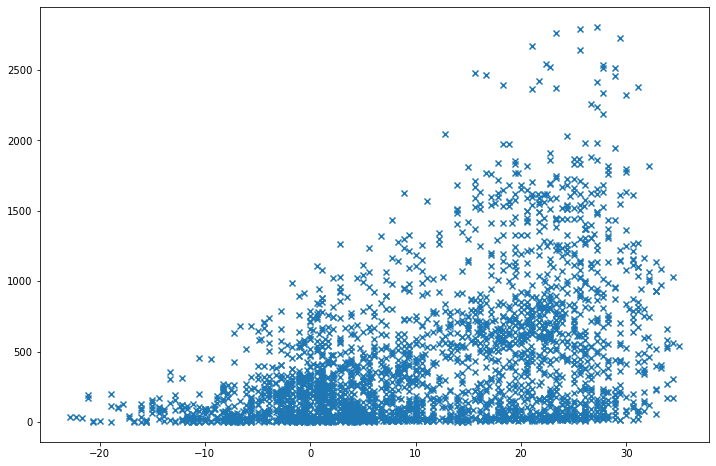

In [23]:
# plot the regression model
plt.figure(figsize=(12,8))

plt.scatter(X_test.iloc[:, 1], y_test, marker='x')

#plt.plot()

plt.show()

In [24]:
# evaluation metrics
print(f'Coefficient of determination: {r2_score(y_pred, y_test):.4f}')

print(f'Root mean squared error: {mean_squared_error(y_pred, y_test)**0.5:.4f}')

print(f'Mean absolute error: {mean_absolute_error(y_pred, y_test):.4f}')

Coefficient of determination: 0.9681
Root mean squared error: 83.4189
Mean absolute error: 42.4286


# Prediction

## Linear 

In [77]:
def demand_next_hour(rides_last_hour=0, temp=0, rain=0, date=datetime.datetime.now()):
    X_predictor = np.zeros(30)
    X_predictor = pd.DataFrame(X_predictor)
    X_predictor = X_predictor.T
    X_predictor.columns = X_test.columns
    
    X_predictor['Rides_last_hour'] = rides_last_hour
    X_predictor['avg_tmp'] = temp
    X_predictor['is_raining'] = rain
    
    if date.weekday() < 5:
        X_predictor['is_workday'] = 1
    
    if date.month < 4:
        X_predictor['season__1'] = 1
    elif date.month < 7:
        X_predictor['season__2'] = 1
    elif date.month < 10:
        X_predictor['season__3'] = 1
        
    if date.hour == 23:
        pass
    else:
        X_predictor[f'hour__{date.hour}'] = 1
    
    y_pred = model.predict(X_predictor)
    
    return y_pred
    

In [78]:
# predict demand in the next hour
# if demand last in last hour was 50, temperature is 19 °C and no rain
demand_next_hour(50, 19, 0)

array([56.85984159])

## Polynomial

In [79]:
def demand_next_hour(rides_last_hour=0, temp=0, rain=0, date=datetime.datetime.now()):
    X_predictor = np.zeros(30)
    X_predictor = pd.DataFrame(X_predictor)
    X_predictor = X_predictor.T
    X_predictor.columns = X_test.columns
    
    X_predictor['Rides_last_hour'] = rides_last_hour
    X_predictor['avg_tmp'] = temp
    X_predictor['is_raining'] = rain
    
    if date.weekday() < 5:
        X_predictor['is_workday'] = 1
    
    if date.month < 4:
        X_predictor['season__1'] = 1
    elif date.month < 7:
        X_predictor['season__2'] = 1
    elif date.month < 10:
        X_predictor['season__3'] = 1
        
    if date.hour == 23:
        pass
    else:
        X_predictor[f'hour__{date.hour}'] = 1
        
    X_predictor_poly = poly.fit_transform(X_predictor)
    
    y_pred = poly_model.predict(X_predictor_poly)
    
    return y_pred

In [80]:
demand_next_hour(50, 19, 0)

array([82.07461545])